### 시계열 모델을 활용한 결측치 예측과 대처 방법
결측치를 예측하는 시계열 모델을 구축하고, 이 모델을 사용하여 결측치를 대체하는 방법
* 정확한 대체 가능
* 시계열 데이터의 특성 반영
* 다양한 시계열 예측 모델 적용할 수 있음
* 모델의 성능을 평가하고 선택할 수 있다.

주의사항
* 모델을 적용할 시계열의 데이터의 범위를 신중하게 선택해야 함
* 데이터에 시간적 의존성이 존재해야 함
* 예측 변수의 품질과 결측치의 분포에 따라 모델의 성능이 달라짐
* 예측 결과의 불확실성을 가지고 있을 수 있어 신뢰구간을 고려하여 대체값을 결정하는 것이 중요
* 모델의 선택과 하이퍼파라미터 조정에 주의

## ARIMA(자동회귀누적이동평균)
시계열 데이터의 패턴을 파악하여 미래 값을 예측하는 모델

          Date  Value
100 2023-04-11    NaN
101 2023-04-12    NaN
102 2023-04-13    NaN
103 2023-04-14    NaN
104 2023-04-15    NaN
..         ...    ...
196 2023-07-16    NaN
197 2023-07-17    NaN
198 2023-07-18    NaN
199 2023-07-19    NaN
200 2023-07-20    NaN

[101 rows x 2 columns]


C:\Users\smjin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\smjin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\smjin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\smjin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


          Date  Value  Value_arima
100 2023-04-11    NaN    -0.103570
101 2023-04-12    NaN    -0.095800
102 2023-04-13    NaN    -0.083318
103 2023-04-14    NaN    -0.072099
104 2023-04-15    NaN    -0.088166
..         ...    ...          ...
196 2023-07-16    NaN    -0.028435
197 2023-07-17    NaN    -0.027402
198 2023-07-18    NaN    -0.022171
199 2023-07-19    NaN    -0.018900
200 2023-07-20    NaN    -0.025208

[101 rows x 3 columns]


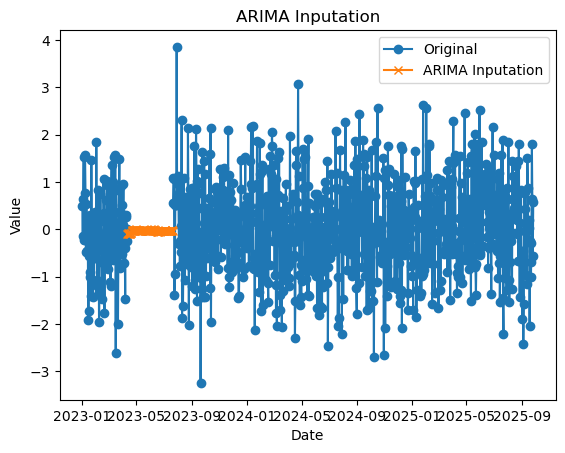

In [3]:
# ARIMA 모델 활용해 결측치 예측과 대처 실습
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# 시계열 데이터 생성
np.random.seed(42)
dates = pd.date_range(start='2023-01-01', periods=1000, freq='D')
values = np.random.randn(1000)

# 데이터프레임 생성
data = pd.DataFrame({'Date' : dates, 'Value' : values})

# 결측치 생성
data.loc[100:200, 'Value'] = np.nan
print(data.loc[100:200])

# ARIMA 모델 적합
model = ARIMA(data['Value'].dropna(), order = (1, 1, 1))
model_fit = model.fit()

# 결측치 예측
predicted_values = model_fit.predict(start = 100, end=2000)

# 결측치 대체
data.loc[100:200, 'Value_arima'] = predicted_values
print(data.loc[100:200])

# 시계열 데이터 시각화
plt.plot(data['Date'], data['Value'], 'o-', label='Original')
plt.plot(data['Date'], data['Value_arima'], 'x-', label='ARIMA Inputation')
plt.xlabel("Date")
plt.ylabel('Value')
plt.title('ARIMA Inputation')
plt.legend()
plt.show()